# Image exercises 1: Greyscale graphics

This notebook is part of [_The Joy of Jupyter_](https://github.com/mwermelinger/The-Joy-of-Jupyter), an introduction on how to use Jupyter notebooks and what can be done with them. 

This is an example of using notebooks for exercise handouts.

**Important:** The notebook includes the resulting images so that you can see what each exercise should produce before you attempt it. Running all cells will remove those images, so instead run one cell at a time, as you work through the notebook.

## Introduction

A greyscale image that is $w$ pixels wide and $h$ pixels high can be represented as a $w \times h$ matrix of numbers,
each number representing a level of grey. 
Most greyscale images use 8-bit numbers to represent up to $2^8 = 256$ grey levels. 
Conventionally 0 denotes black and 255 denotes white.

In Python, such an image can be represented as a list of lists of integers, each inner list being a row of pixels, 
from left to right, and the outer list having the rows from top to bottom. 
For example, the following is a 3 by 5 image of a black cross on white background:

In [1]:
cross = [
  [255, 255, 255], # row 0
  [255,  0,  255], # row 1
  [  0,  0,  0],   # row 2
  [255,  0,  255], # row 3
  [255, 255, 255]  # row 4
]

Each pixel can be accessed with x-y coordinates, x going from 0 (left column) to $w-1$ (right column),
and y going from 0 (top row) to $h-1$ (bottom row). To access a pixel it's necessary to first index the row,
and then the column within the row, so `cross[y][x]` is the pixel at row y, column x. 
For example, the centre of the cross is in row 2, column 1: 

In [2]:
cross[2][1]

0

## Basic functions

Having defined a representation for greyscale images, I can start implementing basic functionality.

To generate images we need to start from an 'empty' image.

In [3]:
def black(width, height):
    """Return a black image of the given size.
    
    width and heigth: positive integers
    """
    image = []
    for y in range(height):
        row = []
        for x in range(width):
            row.append(0)
        image.append(row)
    return image

Let's check it constructs the correct list.

In [4]:
black(3, 5)

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]

**Exercise:** How would you change the above code to generate a blank canvas, i.e. a white image?

To manipulate a given image, we need to obtain its size.

In [5]:
def height(image):
    """Return the height of the image."""
    return len(image)

def width(image):
    """Return the width of the image."""
    return len(image[0])

Let's check they return the expected width and height.

In [6]:
width(black(3, 5))

3

In [7]:
height(black(3, 5))

5

It is essential to be able to read and write greyscale images from files.
I will use the Python Image Library (PIL), because it is able to read and write many file formats.
It automatically detects the format from the file's extension, like `.jpg` and `.png`.

In [8]:
import PIL

def read(filename):
    """Read the filename and return the target.
    
    filename: a string with the name of local greyscale image
    """
    source = PIL.Image.open(filename)
    if source.mode != 'L':
        raise ValueError(filename + ' is not a greyscale image')
    w = source.width
    h = source.height
    target = black(w, h)
    for y in range(h):
        for x in range(w):
            target[y][x] = source.getpixel((x, y))
    return target

def write(source, filename):
    """Write the source image to the given file.
    
    filename: a string with the name of a local file
    """
    w = width(source)
    h = height(source)
    target = PIL.Image.new("L", (w, h))
    for y in range(h):
        for x in range(w):
            target.putpixel((x, y), source[y][x])
    target.save(filename)

To show an image in the notebook, I will use the IPython display system. 
It can only show PNG, JPG and GIF images, so I will first save the image to a PNG file.
I can always save to the same file because, once shown, the images become embedded in (i.e. part of) the notebook.

In [9]:
import IPython.display

def show(image, width=None):
    """Save the image in a PNG file and return the graphic.
    
    To see the image, call this function last in a code cell.
    If width is not None, resize the image to fit the given width.
    
    width: a positive integer"""
    filename = '__temporary__.png'
    write(image, filename)
    return IPython.display.Image(filename, width=width)

Let's try reading and showing a moon image taken from the [USC-SIPI Image Database](http://sipi.usc.edu/database/)
(image 5.1.09 in the Miscellaneous volume).

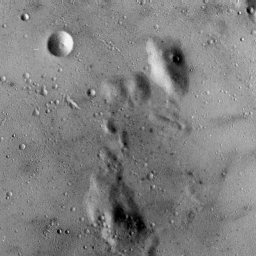

In [10]:
moon = read('moon.tiff')
show(moon)

Reducing (resp. increasing) the width will reduce (resp. enlarge) the image proportionally.

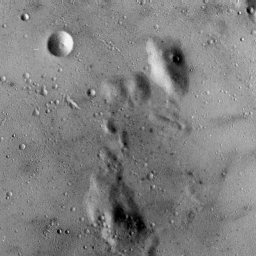

In [11]:
show(moon, 100)

Let's confirm our generated images are correctly displayed.

In [12]:
show(black(3, 5))

In [13]:
show(cross)

The cross is too small (3 by 3 pixels) to see properly. Let's enlarge it. Enlarging images makes them blurry.

In [14]:
show(cross, 50)

Image manipulation can be destructive (the source image is lost) or non-destructive (the source is preserved).
For the latter we need to manipulate a copy of the source image.

In [15]:
def copy(source):
    """Return a copy of the source image."""
    # create an empty image of the same size
    w = width(source)
    h = height(source)
    target = black(w, h)
    # copy all pixels, one by one
    for y in range(h):
        for x in range(w):
            target[y][x] = source[y][x]
    return target

## Exercises

Now it's your turn! Complete the following functions.

### Gradient

Generate an image that shows all possible grey levels. 
The function body will have a similar structure to the `copy` function above.

In [16]:
def gradient(width):
    """Return an image of height 256 that goes from black (top) to white (bottom).
    
    width: a positive integer
    """


In [17]:
show(gradient(10))

### Luminosity

The following destructive functions will change the grey level of individual pixels. 
A simplified loop can be used, as shown below. 

The negative image has the opposite grey levels: the darker the grey originally, the lighter it becomes, 
and vice-versa. In particular, white becomes black and black becomes white. 

Complete the assignment statement. No further lines of code are needed.

In [18]:
def negative(image):
    """Invert the grey levels of the image."""
    for row in image:
        for x in range(len(row)):
            row[x] = # write the missing expression

In [19]:
greys = gradient(10)
negative(greys)
show(greys)

In the negative image of the moon, valleys look like hills, and the sunlight is coming from the opposite side.

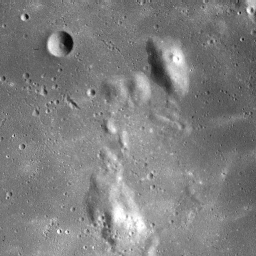

In [20]:
negative(moon)
show(moon)

A greyscale image can be transformed into a black and white image by transforming 
half of the 256 grey levels into black and the other half into white.

In [21]:
def black_and_white(image):
    """Reduce the greyscale to black and white."""


Applying the function to the gradient strip will lead to the upper half (darker greys) becoming black and the bottom half (lighter greys) becoming white.

In [22]:
bw = gradient(10)
black_and_white(bw)
show(bw)

Applying the function to a normal image will lead to extreme constrasts.

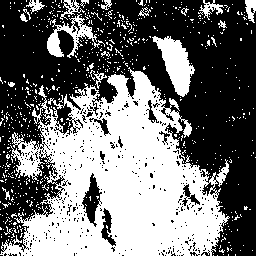

In [23]:
black_and_white(moon)
show(moon)

You can also try to make an image darker or lighter. 
By repeating the process, it should eventually become all black or all white.

### Flip

A simple image transformation is to mirror it along a central vertical or horizontal axis.

In [24]:
def flip_horizontal(image):
    """Flip the image horizontally, swapping the left and right sides."""


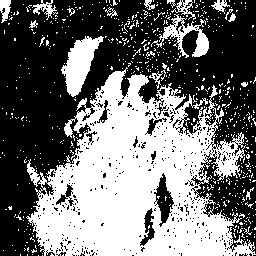

In [25]:
flip_horizontal(moon)
show(moon)

In [26]:
def flip_vertical(image):
    """Flip the image vertically, swapping the top and bottom sides."""


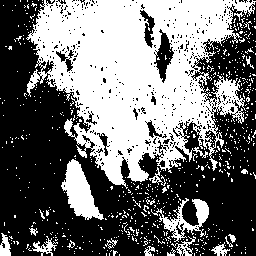

In [27]:
flip_vertical(moon)
show(moon)

### Rotate

Rotating by 180 degrees is easy once the flips are implemented.
Write a more efficient function that does the rotation is one single pass of the pixels.

In [28]:
def rotate_180(image):
    "Rotate the image by 180 degrees."""
    flip_horizontal(image)
    flip_vertical(image)

The moon image is already flipped horizontally and vertically.
By rotating it 180 degrees we get the back to the first balck and white image above.

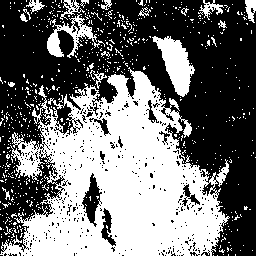

In [29]:
rotate_180(moon)
show(moon)

### Change size

There are other operations that change the size of an image.
One of the best known is cropping: selecting only a rectangular region of the image. 
The region is defined by its top left and bottom right corners.

In [30]:
def crop(image, top, left, bottom, right):
    """Return the cropped region.
    
    left, right: integers such that 0 <= left <= right <= width(image)
    top, bottom: integers such that 0 <= top <= bottom <= height(image)
    """


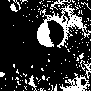

In [31]:
show(crop(moon, 10, 10, 100, 100))

### Other manipulations

Many other image manipulations are possible, like blurring and resizing (reducing or enlarging). The latter can be done proportionally (to keep the image's aspect ratio) or the image can be distorted into a given size. Zooming into part of an image can be achieved by cropping that region and then enlarging it.

Images can also be slightly changed to include a secret text message or to hide a different image! Search online for 'steganography'.  

Other operations take several images and combine them into a single one.